In [18]:
# Import các thư viện cần thiết
# numpy, pandas: xử lý dữ liệu
# matplotlib: vẽ biểu đồ
# torchvision: tải EMNIST-Digits
# scipy.ndimage, stats: căn giữa ảnh, thống kê
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets
from scipy import ndimage, stats
from PIL import Image
import os

In [5]:
# Import lớp KNNClassifier từ file knn_classifier.py
from knn_classifier import KNNClassifier

In [11]:
# Tiền xử lý, lưu ảnh PNG, và huấn luyện KNN trên MNIST (train)
# Mục đích: Tải 60,000 mẫu, làm phẳng, chuẩn hóa, lưu .npy, lưu PNG, huấn luyện k=3
knn = KNNClassifier(k=3, use_kdtree=True, weighted_voting=False)

# Kiểm tra file .npy để tái sử dụng
if os.path.exists('X_train_mnist.npy') and os.path.exists('y_train_mnist.npy'):
    X_train = np.load('X_train_mnist.npy')  # Shape: (60000, 784)
    y_train = np.load('y_train_mnist.npy')  # Shape: (60000,)
    print("Đã tải dữ liệu từ file .npy")
else:
    # Tạo thư mục lưu ảnh PNG
    png_train_dir = 'D:/KNN_Final/mnist_data/png/train'
    os.makedirs(png_train_dir, exist_ok=True)
    
    # Tải MNIST train từ torchvision, lưu vào D:\KNN_Final\mnist_data
    dataset = datasets.MNIST(root='D:/KNN_Final/mnist_data', train=True, download=True)
    X_train, y_train = [], []
    for idx, (image, label) in enumerate(dataset):
        # Tiền xử lý: Chuyển PIL.Image thành numpy, làm phẳng 28x28 thành 784 chiều, chuẩn hóa [0, 1]
        image_np = np.array(image, dtype=np.float32)
        X_train.append(image_np.flatten() / 255.0)
        y_train.append(label)
        
        # Lưu ảnh dưới dạng PNG
        image.save(os.path.join(png_train_dir, f'train_{idx:06d}_label_{label}.png'))
        
    X_train = np.array(X_train)  # Shape: (60000, 784)
    y_train = np.array(y_train)  # Shape: (60000,)
    np.save('X_train_mnist.npy', X_train)  # Lưu vào thư mục dự án
    np.save('y_train_mnist.npy', y_train)
    print("Đã tải, lưu dữ liệu .npy và ảnh PNG vào D:/KNN_Final/mnist_data/png/train")

# Kiểm tra phân phối nhãn
print("Phân phối nhãn trong y_train:", np.bincount(y_train))
print(f"Tổng số mẫu huấn luyện: {len(y_train)}")

# Huấn luyện KNN với dữ liệu (k=3, dùng KD-Tree)
knn.fit(X_train, y_train)

100.0%
100.0%
100.0%
100.0%


Đã tải, lưu dữ liệu .npy và ảnh PNG vào D:/KNN_Final/mnist_data/png/train
Phân phối nhãn trong y_train: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Tổng số mẫu huấn luyện: 60000


In [20]:
# Tiền xử lý, lưu ảnh PNG, và tính độ chính xác trên tập test (10,000 mẫu)
# Tái sử dụng numpy, torchvision.datasets, PIL.Image, os từ Cell 1
png_test_dir = 'D:/KNN_Final/mnist_data/png/test'
os.makedirs(png_test_dir, exist_ok=True)

dataset_test = datasets.MNIST(root='D:/KNN_Final/mnist_data', train=False, download=True)
X_test, y_test = [], []
for idx, (image, label) in enumerate(dataset_test):
    # Tiền xử lý: Chuyển PIL.Image thành numpy, làm phẳng 28x28 thành 784 chiều, chuẩn hóa [0, 1]
    image_np = np.array(image, dtype=np.float32)
    X_test.append(image_np.flatten() / 255.0)
    y_test.append(label)
    
    # Lưu ảnh dưới dạng PNG
    image.save(os.path.join(png_test_dir, f'test_{idx:06d}_label_{label}.png'))

X_test = np.array(X_test)  # Shape: (10000, 784)
y_test = np.array(y_test)  # Shape: (10000,)
print("Đã lưu ảnh PNG test vào D:/KNN_Final/mnist_data/png/test")

# Lưu dữ liệu test vào file .npy
np.save('X_test_mnist.npy', X_test)
np.save('y_test_mnist.npy', y_test)
print("Đã lưu dữ liệu test vào X_test_mnist.npy và y_test_mnist.npy")



Đã lưu ảnh PNG test vào D:/KNN_Final/mnist_data/png/test
Đã lưu dữ liệu test vào X_test_mnist.npy và y_test_mnist.npy


In [10]:
# Dự đoán và tính độ chính xác (k=3 từ Cell 3)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Độ chính xác trên tập test (k=3): {accuracy:.4f}")

KeyboardInterrupt: 

Đã tải dữ liệu test từ file .npy
Đang thử k=3...
Độ chính xác với k=3: 0.9705
Đang thử k=5...
Độ chính xác với k=5: 0.9688
Đang thử k=7...
Độ chính xác với k=7: 0.9694
Đang thử k=9...
Độ chính xác với k=9: 0.9659


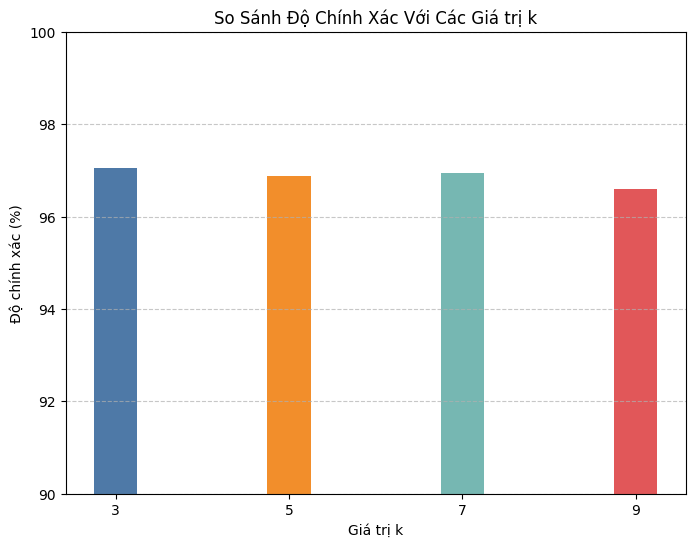


So sánh độ chính xác:
k=3: 0.9705
k=5: 0.9688
k=7: 0.9694
k=9: 0.9659

Giá trị k tốt nhất: k=3 với độ chính xác 0.9705


In [21]:
# Vẽ biểu đồ cột so sánh độ chính xác với k=3, 5, 7, 9
# Tái sử dụng numpy, matplotlib.pyplot, os từ Cell 1

# Tải dữ liệu test từ file .npy (giả sử đã lưu trước đó)
try:
    X_test = np.load('X_test_mnist.npy')  # Shape: (10000, 784)
    y_test = np.load('y_test_mnist.npy')  # Shape: (10000,)
    print("Đã tải dữ liệu test từ file .npy")
except FileNotFoundError:
    print("Không tìm thấy file X_test_mnist.npy hoặc y_test_mnist.npy. Vui lòng kiểm tra lại hoặc chạy lại cell trước để lưu dữ liệu test.")
    X_test, y_test = None, None
    raise FileNotFoundError("Dữ liệu test chưa được lưu. Hãy lưu X_test và y_test trước.")

# Tải dữ liệu huấn luyện từ file .npy
X_train = np.load('X_train_mnist.npy')  # Shape: (60000, 784)
y_train = np.load('y_train_mnist.npy')  # Shape: (60000,)

# Danh sách giá trị k để so sánh
k_values = [3, 5, 7, 9]
accuracies = {}  # Từ điển lưu độ chính xác theo giá trị k

# Thử từng giá trị k
for k in k_values:
    print(f"Đang thử k={k}...")
    # Khởi tạo và huấn luyện mô hình KNN với k hiện tại
    knn = KNNClassifier(k=k, use_kdtree=True, weighted_voting=False)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)  # Dự đoán trên tập test
    accuracy = np.mean(predictions == y_test)  # Tính độ chính xác
    accuracies[k] = accuracy  # Lưu độ chính xác
    print(f"Độ chính xác với k={k}: {accuracy:.4f}")

# Vẽ biểu đồ cột sử dụng matplotlib
plt.figure(figsize=(8, 6))  # Tạo figure với kích thước 8x6 inch
plt.bar(accuracies.keys(), [acc * 100 for acc in accuracies.values()], color=['#4e79a7', '#f28e2b', '#76b7b2', '#e15759'], width=0.5)  # Vẽ cột
plt.ylim(90, 100)  # Giới hạn trục y từ 90% đến 100%
plt.xlabel("Giá trị k")  # Nhãn trục x
plt.ylabel("Độ chính xác (%)")  # Nhãn trục y
plt.title("So Sánh Độ Chính Xác Với Các Giá trị k")  # Tiêu đề biểu đồ
plt.xticks(k_values)  # Đặt nhãn trục x là các giá trị k
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Thêm lưới trục y
plt.show()  # Hiển thị biểu đồ

# In kết quả so sánh độ chính xác
print("\nSo sánh độ chính xác:")
for k, acc in accuracies.items():
    print(f"k={k}: {acc:.4f}")

# Tìm giá trị k tốt nhất
best_k = max(accuracies, key=accuracies.get)
print(f"\nGiá trị k tốt nhất: k={best_k} với độ chính xác {accuracies[best_k]:.4f}")